In [1]:
import porespy as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from genrandsp import *

## Method I : Porosity

In [2]:
gsp = generate_spherepack([200, 200, 200], [12, 8, 4], 0.25, loop_limits=4000)

In [3]:
sphere_coords = gsp.method_I(0.7)

Loop #00500, n_spheres=00400, porosity=0.8464
Loop #01000, n_spheres=00646, porosity=0.8232
Loop #01500, n_spheres=00837, porosity=0.8101
Loop #02000, n_spheres=00978, porosity=0.8018
Removed 12 from the list of sphere sizes at loop 2000...
Loop #02000, n_spheres=00978, porosity=0.8018
Loop #02500, n_spheres=01089, porosity=0.7969
Loop #03000, n_spheres=01202, porosity=0.7927
Loop #03500, n_spheres=01295, porosity=0.7886
Reached number of loops limit!
You can change this by setting generate_spherepack.loop_limits to the number you want

Final state:
Loop #04000, n_spheres=01374, porosity=0.7846
Number of spheres of each size : {12: 128, 8: 243, 4: 1002}


In [4]:
df = pd.DataFrame(np.copy(sphere_coords), columns=['X', 'Y', 'Z', 'R'])
print(df)
(df['X'].max()*df['Y'].max()*df['Z'].max())**0.333

               X           Y           Z     R
0      51.302581   32.653008   94.719853  12.0
1      94.954915  133.459159   26.326581  12.0
2      50.227515  181.411212  182.432086  12.0
3     160.160495  153.313173   21.093742  12.0
4     117.429266   97.860982   46.479105  12.0
...          ...         ...         ...   ...
1369  186.178657  167.348710  138.222237   4.0
1370   16.971521   15.371755  140.797599   4.0
1371   80.983248  105.553319   33.525131   4.0
1372  144.402293  155.671745   24.618403   4.0
1373  122.356453  178.129055   76.901378   4.0

[1374 rows x 4 columns]


186.88250669357214

Generate Image using porespy

In [5]:
im = ps.generators.spheres_from_coords(df)

In [6]:
print(f"Image poro : {1-np.count_nonzero(im)/im.size:.4f}")
print(f"Image size : {im.shape}")

Image poro : 0.7808
Image size : (200, 196, 197)


Save Image as numpy array

In [7]:
np.save('rand_sphere_pack_M1',im)

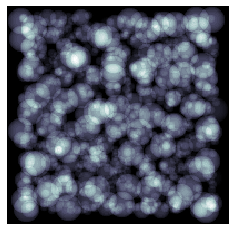

In [8]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(False);

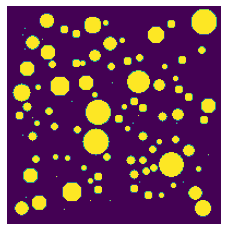

In [9]:
fig, ax = plt.subplots()
ax.imshow(im[:,:,np.random.randint(0, len(im))])
ax.axis(False);

## Method II : Number of Spheres

In [10]:
gsp = generate_spherepack([200, 200, 200], [8, 18, 4], 0.25)

In [ ]:
sphere_coords = gsp.method_II(2000)

Loop #00500, n_spheres=00343, porosity=0.8414
Loop #01000, n_spheres=00553, porosity=0.8226


In [ ]:
df = pd.DataFrame(np.copy(sphere_coords), columns=['X', 'Y', 'Z', 'R'])
print(df)
(df['X'].max()*df['Y'].max()*df['Z'].max())**0.333

Generate Image using porespy

In [ ]:
im = ps.generators.spheres_from_coords(df)

In [ ]:
print(f"Image poro : {1-np.count_nonzero(im)/im.size:.4f}")
print(f"Image size : {im.shape}")

Save Image as numpy array

In [ ]:
np.save('rand_sphere_pack_M1',im)

In [ ]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(False);

In [ ]:
fig, ax = plt.subplots()
ax.imshow(im[:,:,np.random.randint(0, len(im))])
ax.axis(False);